# Performance Measures

### Cross Validation

##### Stochastique Gradien Descent

In [13]:
cv_score_sgd = cross_val_score(sgd_clf, X_train, y_train_8, cv = 3, scoring = "accuracy")

In [14]:
cv_score_sgd = np.mean(cv_score_sgd)
cv_score_sgd

0.9290476190476191

#### Random Forest

In [15]:
cv_score_rf = cross_val_score(rf_clf, X_train, y_train_8, cv= 3, scoring = "accuracy")

In [16]:
cv_score_rf = np.mean(cv_score_rf)
cv_score_rf

0.9784391534391533

#### Comparing with a dump classifier

In [17]:
class Never8Classifier(BaseEstimator):
    def fit(sef, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_8_clf = Never8Classifier()

cross_val_score(never_8_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.90190476, 0.90452381, 0.90309524])

### Confusion Matrix

##### Stochastique Gradien Descent

In [27]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv= 3)


confusion_matrix(y_train_8, y_train_pred)

array([[32684,  1456],
       [ 1226,  2434]], dtype=int64)

## Precision

In [29]:
recall_score(y_train_8, y_train_pred)

0.6650273224043716

## F1 Score

In [30]:
Score = f1_score(y_train_8, y_train_pred)
print(Score)

0.6447682119205298


## Precision/Recall Trade-off

##### Stochastique Gradien Descent

In [31]:
y_scores= cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")
print(y_scores)

[  5580.91948734 -17365.2819848   -9564.08465703 ... -17868.66116797
 -45243.94591894 -12688.82248749]


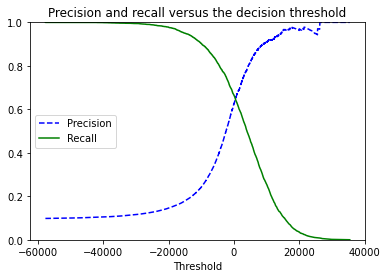

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_train_8,y_scores)

# here we use matplotlib to plot recall and precision as functions of the thresholds

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.title('Precision and recall versus the decision threshold')

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Score for 1st digit: 3936.4205968149363
Was this digit a real 8? False


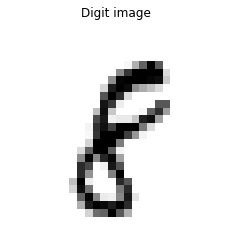

In [33]:
y_scores = sgd_clf.decision_function([X_train[0]])
print("Score for 1st digit: {0}".format(y_scores[0]))
print("Was this digit a real 8? {0}".format(y_train_8[0]))

digit_image = X_train[0].reshape(28,28)
plt.imshow(digit_image, cmap= matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.title("Digit image")
plt.show()

In [34]:
threshold = -200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Another way to select the best value of the threshold is to plot precision directly against recall 

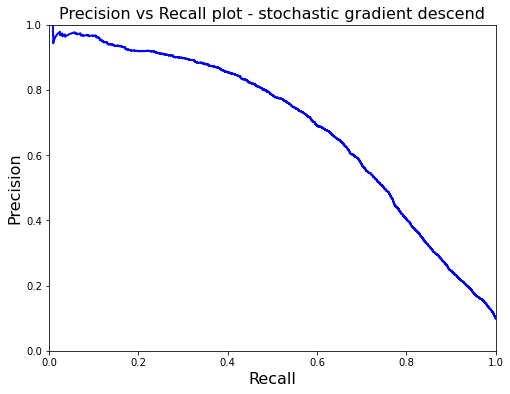

In [35]:
def print_recalls_precision(recalls, precisions, title):
    plt.figure(figsize=(8,6))
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.title("Precision vs Recall plot - {0}".format(title), fontsize=16)
    plt.axis([0,1,0,1])
    plt.show()
print_recalls_precision(recalls, precisions, "stochastic gradient descend")

#### Random Forest

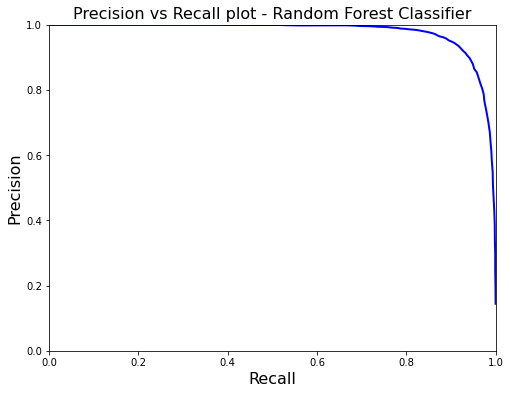

In [36]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_8, cv= 3, method= "predict_proba")
y_scores_forest = y_probas_forest[:,1]

# y_probas_forest contains 2 columns, one per class. Each row's sum of probabilities is equal to 1

precisions_forest, recalls_forest, thresholds = precision_recall_curve(y_train_8,y_scores_forest)
print_recalls_precision(recalls_forest, precisions_forest, "Random Forest Classifier")

#### dumb classifier

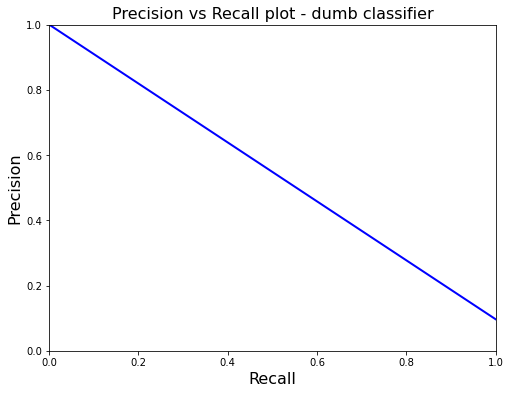

In [37]:
never_8_predictions = cross_val_predict(never_8_clf, X_train, y_train_8, cv=3)

precisions_dumb, recalls_dumb, thresholds = precision_recall_curve(y_train_8, never_8_predictions)

print_recalls_precision(recalls_dumb, precisions_dumb, "dumb classifier")

(0.0, 1.0)

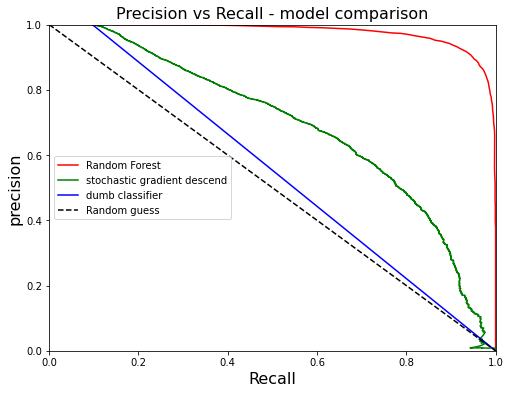

In [38]:
plt.figure(figsize=(8,6))
plt.plot(precisions_forest, recalls_forest, "-r", label="Random Forest")
plt.plot(precisions,recalls, "-g",label="stochastic gradient descend")
plt.plot(precisions_dumb, recalls_dumb, "-b", label="dumb classifier")
plt.plot([0, 1], [1,0], "k--", label="Random guess")

plt.xlabel("Recall", fontsize=16)
plt.ylabel("precision", fontsize=16)


plt.title("Precision vs Recall - model comparison", fontsize=16)
plt.axis([0,1,0,1])
plt.legend(loc="center left")
plt.ylim([0, 1])

In [39]:
print("F1 score for dumb classifier: {0}".format(f1_score(y_train_8, never_8_predictions)))
print("F1 score for SGD classifier: {0}".format(f1_score(y_train_8, y_train_pred)))
print("F1 score for Random Forest: {0}".format(f1_score(y_train_8, y_scores_forest > 0.5)))

F1 score for dumb classifier: 0.0
F1 score for SGD classifier: 0.6447682119205298
F1 score for Random Forest: 0.8760456273764259
